In [1]:
# Cardiovascular Disease Data Analysis Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("CVD_cleaned.csv")
print(df.shape)





(308854, 19)


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [3]:

# Get min values for each column
print("Minimum values:\n", df.min(numeric_only=True))

# Get max values for each column
print("\nMaximum values:\n", df.max(numeric_only=True))


Minimum values:
 Height_(cm)                     91.00
Weight_(kg)                     24.95
BMI                             12.02
Alcohol_Consumption              0.00
Fruit_Consumption                0.00
Green_Vegetables_Consumption     0.00
FriedPotato_Consumption          0.00
dtype: float64

Maximum values:
 Height_(cm)                     241.00
Weight_(kg)                     293.02
BMI                              99.33
Alcohol_Consumption              30.00
Fruit_Consumption               120.00
Green_Vegetables_Consumption    128.00
FriedPotato_Consumption         128.00
dtype: float64


In [4]:


# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Binary Yes/No columns
binary_cols = [
    "Heart_Disease", "Skin_Cancer", "Other_Cancer", 
    "Depression", "Diabetes", "Arthritis", "Smoking_History"
]
for col in binary_cols:
    if col in df.columns and df[col].dtype == "object":
        df[col] = df[col].map({"Yes": 1, "No": 0})

# Sex column
if "Sex" in df.columns and df["Sex"].dtype == "object":
    df["Sex"] = df["Sex"].map({"Female": 1, "Male": 0})

# Other categorical columns
cat_cols = ["General_Health", "Checkup", "Exercise", "Age_Category"]
for col in cat_cols:
    if col in df.columns and df[col].dtype == "object":
        df[col] = df[col].astype("category").cat.codes.replace(-1, pd.NA)



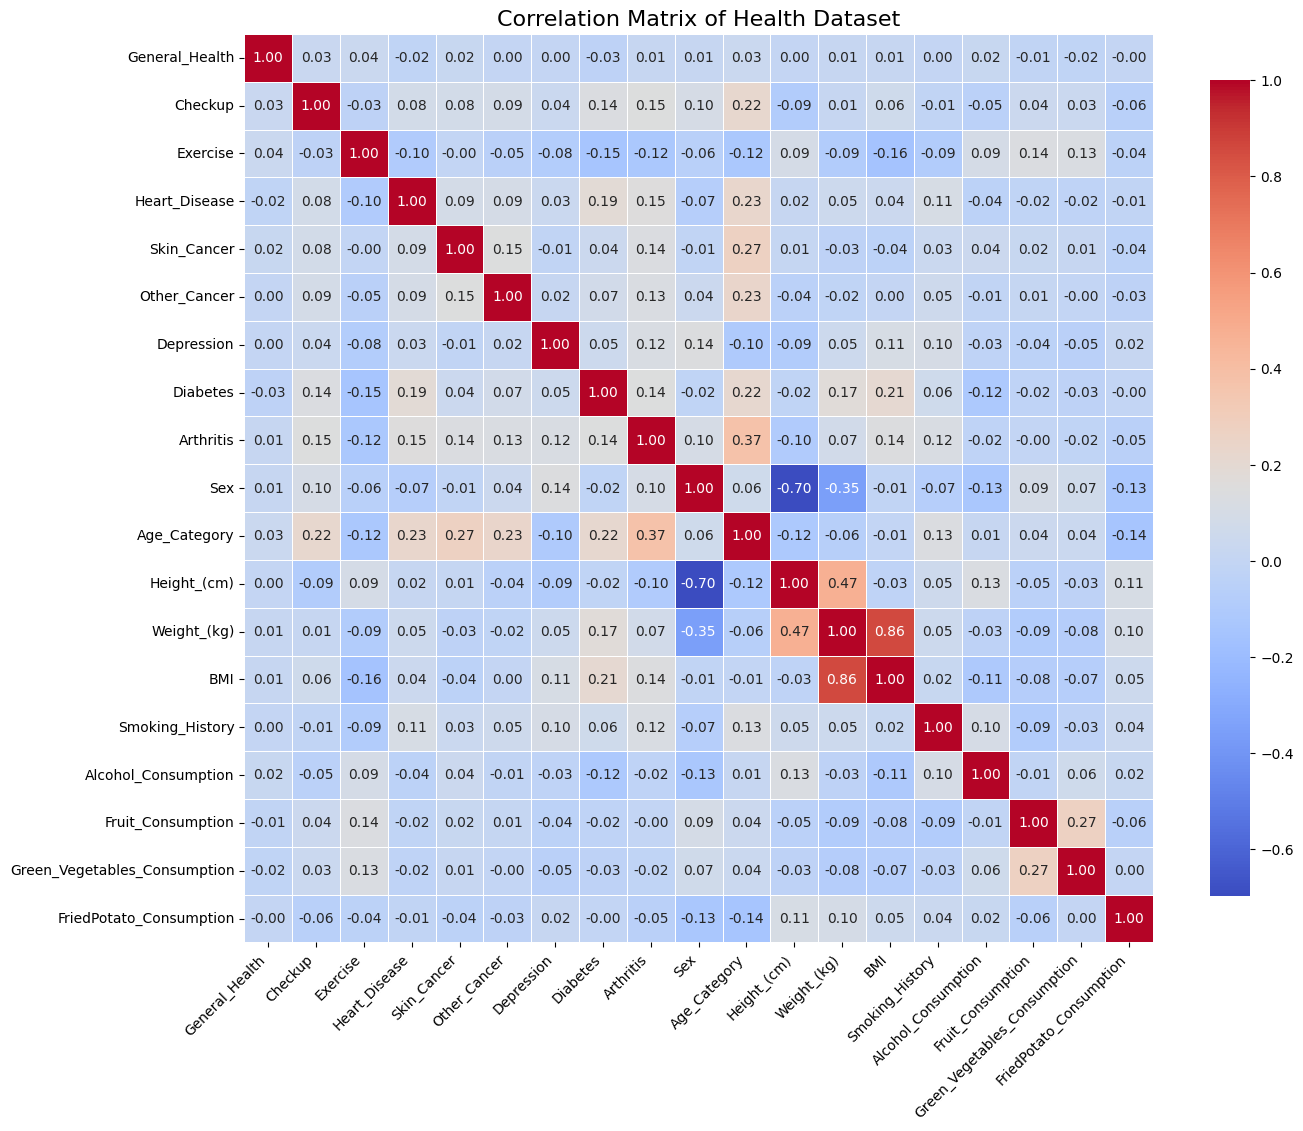

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (only numeric columns)
corr = df.select_dtypes(include="number").corr()

# Set up the plot
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix of Health Dataset", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [6]:
df.to_csv("cleaned_health_data.csv", index=False)

